In [1]:
import os, time
import math
import rasterio
import numpy as np
from spectral import *
import gdal
from gdal import *
from gdal import osr
import pandas as pd
import matplotlib.pyplot as plt
import math
from matplotlib.colors import ListedColormap
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [6]:
image=r'D:\AA_GEOINFO_IIST\AA_LABS\RS\lab 4\Data given\Landsat_B10.tif'

In [7]:
dataset = rasterio.open(image)
Crs = dataset.crs
trans = dataset.transform
cols = dataset.width
rows = dataset.height
bands= dataset.count

In [8]:
print(dataset)
print(Crs)
print(trans)
print(cols,rows,bands)

<open DatasetReader name='D:\AA_GEOINFO_IIST\AA_LABS\RS\lab 4\Data given\Landsat_B10.tif' mode='r'>
EPSG:32644
| 30.00, 0.00, 190125.00|
| 0.00,-30.00, 3400755.00|
| 0.00, 0.00, 1.00|
3263 3263 1


In [9]:
with rasterio.open(image)as r:
    raster_matrix_img=r.read()    

In [10]:
raster_matrix_img=np.reshape(raster_matrix_img,(rows,cols))

In [11]:
toa_radiance=(3.3240E-04*raster_matrix_img)+0.1000

In [12]:
k1=774.8853
k2=1321.0789
dmtr=(k1/toa_radiance)+1

In [13]:
brightness_temp=k2/(np.log(dmtr))

In [14]:
Bt=brightness_temp-273.15
print(Bt)

[[25.19926964 25.2394419  25.32446735 ... 15.75126735 15.80265167
  15.99512619]
 [25.01240658 25.05737546 25.15199059 ... 16.00281807 16.05152065
  16.20773412]
 [24.85843536 24.90346322 24.99583476 ... 16.27169123 16.35350149
  16.50673026]
 ...
 [30.16878714 30.51527092 30.81341719 ... 19.78277107 19.84221623
  19.91647844]
 [30.47003429 30.81792903 31.05231782 ... 19.92390197 19.9758529
  20.02036316]
 [30.75700535 31.05231782 31.15134883 ... 20.21797382 20.26732235
  20.27965611]]


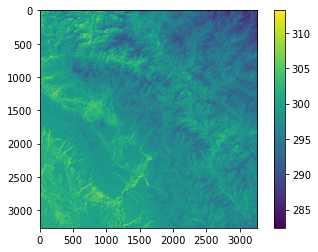

In [15]:
plt.imshow(brightness_temp)
plt.colorbar()

In [16]:
smallest = np.amin(brightness_temp)
biggest = np.amax(brightness_temp)
print(smallest)
print(biggest)

282.43815488646226
313.17675024615914


In [17]:
#ndvi
#b4=r'D:\AA_GEOINFO_IIST\AA_LABS\RS\lab 4\Data given\LC81460392015251LGN00_B4.tif'
#b5=r'D:\AA_GEOINFO_IIST\AA_LABS\RS\lab 4\Data given\LC81460392015251LGN00_B5.tif'
b4=rasterio.open(r'D:\AA_GEOINFO_IIST\AA_LABS\RS\lab 4\Data given\Landsat_B4.tif') # red
b5=rasterio.open(r'D:\AA_GEOINFO_IIST\AA_LABS\RS\lab 4\Data given\Landsat_B5.tif') # nir
Red=b4.read(1).astype('float64')
Nir=b5.read(1).astype('float64')    

In [18]:
ndvi=np.where((Nir+Red)==0.,0,(Nir-Red)/(Nir+Red))
ndvi[:5,:5]

array([[0.42606388, 0.42725553, 0.39966134, 0.33336288, 0.34110375],
       [0.45558557, 0.42954948, 0.40823765, 0.36098845, 0.30368674],
       [0.43810353, 0.43114008, 0.41285331, 0.39913811, 0.39094788],
       [0.44063595, 0.38460235, 0.38791456, 0.39461829, 0.40123904],
       [0.45641494, 0.41753416, 0.38452279, 0.39779881, 0.39450362]])

-0.28055058191584603
0.6326677459974815
3263 3263 1


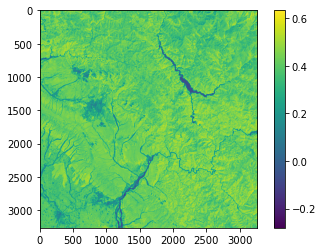

In [19]:
plt.imshow(ndvi)
plt.colorbar()
NDVImin= np.amin(ndvi)
NDVImax= np.amax(ndvi)
print(NDVImin)
print(NDVImax)
print(cols,rows,bands)

In [20]:
# Pv=((ndvi–NDVImin)*(ndvi–NDVImin))/(NDVImax–NDVImin)

In [21]:
y= (0.6326677459974815-0.28055058191584603)
print(y)

0.3521171640816355


In [22]:
a=np.full((3263 , 3263 ),0.28055058191584603 )
a

array([[0.28055058, 0.28055058, 0.28055058, ..., 0.28055058, 0.28055058,
        0.28055058],
       [0.28055058, 0.28055058, 0.28055058, ..., 0.28055058, 0.28055058,
        0.28055058],
       [0.28055058, 0.28055058, 0.28055058, ..., 0.28055058, 0.28055058,
        0.28055058],
       ...,
       [0.28055058, 0.28055058, 0.28055058, ..., 0.28055058, 0.28055058,
        0.28055058],
       [0.28055058, 0.28055058, 0.28055058, ..., 0.28055058, 0.28055058,
        0.28055058],
       [0.28055058, 0.28055058, 0.28055058, ..., 0.28055058, 0.28055058,
        0.28055058]])

In [23]:
b= (ndvi-a)
print(b)

[[ 0.14551329  0.14670495  0.11911076 ...  0.09478389  0.13184078
   0.14113888]
 [ 0.17503499  0.1489989   0.12768706 ...  0.0663252   0.09815488
   0.15442929]
 [ 0.15755295  0.15058949  0.13230273 ...  0.09036387  0.16279972
   0.19106909]
 ...
 [-0.0214938  -0.02579394 -0.08322303 ...  0.08616132  0.06777546
   0.04874915]
 [-0.04869676 -0.07636401 -0.12360055 ...  0.09942952  0.07951708
   0.05008398]
 [-0.07618241 -0.10022637 -0.12181612 ...  0.10759171  0.06214259
   0.05586356]]


In [24]:
x = np.matmul(b,b)
print(x)

[[35.69520612 35.41310839 35.57105724 ... 46.58599699 47.02505903
  47.32879551]
 [35.94480382 35.73481609 35.98864291 ... 46.88388971 47.23307945
  47.65283883]
 [36.75182058 36.67199171 36.86188665 ... 47.21255378 47.57826211
  47.94318512]
 ...
 [37.17562286 37.68937383 37.90863505 ... 54.40982545 54.54913148
  54.4865483 ]
 [36.44123676 36.82706985 37.14587591 ... 53.63960095 54.01809407
  53.98426462]
 [36.65530438 37.02378872 37.21533885 ... 54.01923634 54.61555778
  54.66242202]]


In [25]:
Pv=x/y
print(Pv)

[[101.37309328 100.57194595 101.02051497 ... 132.30254514 133.54946544
  134.41206602]
 [102.08194172 101.48558415 102.20644314 ... 133.14854965 134.14023589
  135.33233732]
 [104.37384009 104.147129   104.68642375 ... 134.08194374 135.12054216
  136.1569103 ]
 ...
 [105.57742324 107.0364574  107.65915131 ... 154.52193475 154.91755884
  154.73982485]
 [103.4917933  104.58754529 105.49294298 ... 152.33452503 153.4094318
  153.31335738]
 [104.0997376  105.14621978 105.6902152  ... 153.41267581 155.10620711
  155.23929987]]


In [26]:
# emissivity calculation (ε = 0.004 * Pv + 0.986)
e1 = 0.004 * Pv 
print(e1)

[[0.40549237 0.40228778 0.40408206 ... 0.52921018 0.53419786 0.53764826]
 [0.40832777 0.40594234 0.40882577 ... 0.5325942  0.53656094 0.54132935]
 [0.41749536 0.41658852 0.41874569 ... 0.53632777 0.54048217 0.54462764]
 ...
 [0.42230969 0.42814583 0.43063661 ... 0.61808774 0.61967024 0.6189593 ]
 [0.41396717 0.41835018 0.42197177 ... 0.6093381  0.61363773 0.61325343]
 [0.41639895 0.42058488 0.42276086 ... 0.6136507  0.62042483 0.6209572 ]]


In [27]:
E =e1 +0.986
print(E)

[[1.39149237 1.38828778 1.39008206 ... 1.51521018 1.52019786 1.52364826]
 [1.39432777 1.39194234 1.39482577 ... 1.5185942  1.52256094 1.52732935]
 [1.40349536 1.40258852 1.40474569 ... 1.52232777 1.52648217 1.53062764]
 ...
 [1.40830969 1.41414583 1.41663661 ... 1.60408774 1.60567024 1.6049593 ]
 [1.39996717 1.40435018 1.40797177 ... 1.5953381  1.59963773 1.59925343]
 [1.40239895 1.40658488 1.40876086 ... 1.5996507  1.60642483 1.6069572 ]]


In [28]:
# LST = (BT / (1 + (0.00115 * BT / 1.4388) * Ln(ε)))
q=np.log(E)
print(q)

[[0.33037682 0.32807118 0.32936278 ... 0.41555416 0.4188405  0.42110763]
 [0.33241241 0.33070014 0.33276951 ... 0.41778504 0.42039375 0.42352069]
 [0.33896581 0.33831947 0.33985629 ... 0.42024059 0.42296585 0.42567787]
 ...
 [0.34239019 0.34652569 0.34828547 ... 0.47255521 0.47354126 0.4730984 ]
 [0.33644879 0.33957469 0.34215021 ... 0.46708569 0.46977718 0.46953691]
 [0.33818431 0.34116469 0.3427105  ... 0.46978529 0.47401111 0.47434245]]


In [29]:
#LST=(brightness_temp/(1+(0.00115*brightness_temp/1.4388)* q))
LST=(Bt/(1+(0.00115*brightness_temp/1.4388)* q))

In [30]:
print(LST)

[[23.35898136 23.40792137 23.47958162 ... 14.37216444 14.40884677
  14.57652475]
 [23.17640285 23.22659717 23.30310166 ... 14.59371256 14.6298646
  14.76180623]
 [23.00133684 23.0460241  23.1231349  ... 14.83001396 14.89564171
  15.0259083 ]
 ...
 [27.85648616 28.14786142 28.4095093  ... 17.81202275 17.86147131
  17.92954095]
 [28.17000323 28.46918582 28.66744245 ... 17.9589495  17.99523386
  18.03597412]
 [28.42220704 28.67378556 28.75453122 ... 18.21182561 18.23969034
  18.24943712]]


8.571764456113643
36.98899008520274
3263 3263 1


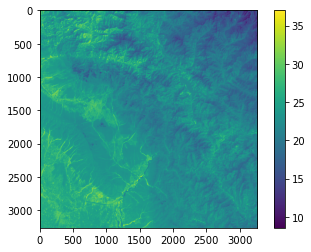

In [31]:
plt.imshow(LST)
plt.colorbar()
LSTmin= np.amin(LST)
LSTmax= np.amax(LST)
print(LSTmin)
print(LSTmax)
print(cols,rows,bands)

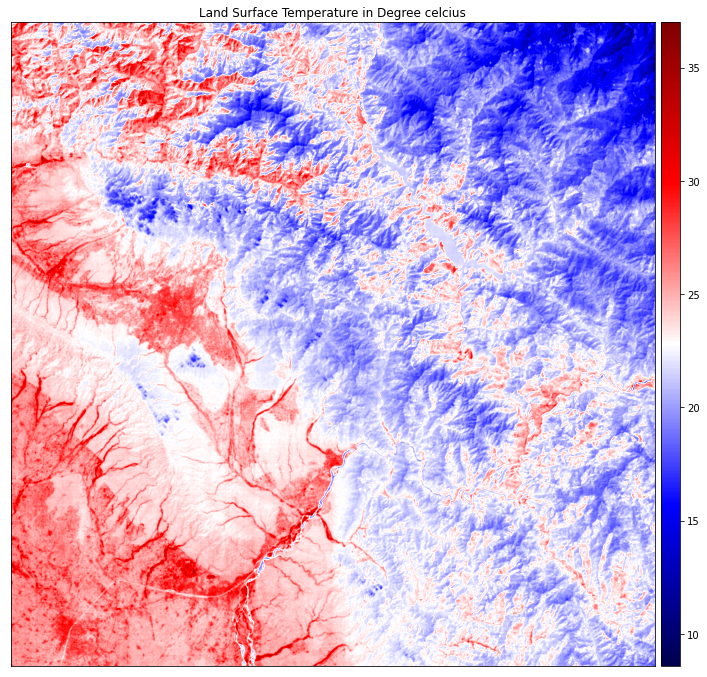

<AxesSubplot:title={'center':'Land Surface Temperature in Degree celcius'}>

In [32]:
title=["Land Surface Temperature in Degree celcius"]
ep.plot_bands(LST,cmap="seismic", cols=1, vmin=8.571764456113643, vmax=36.98899008520274,title=title)